In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crypto_data = pd.read_csv('crypto_data.csv')

In [3]:
crypto_data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
crypto_data.shape

(1252, 7)

In [5]:
active_df = crypto_data.loc[crypto_data['IsTrading'] == True]

In [6]:
active_df.shape

(1144, 7)

In [7]:
dropped_trading_df = active_df.drop(['IsTrading'], axis=1)
dropped_trading_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
dropped_nan = dropped_trading_df.dropna()
dropped_nan

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
positive_df = dropped_nan[dropped_nan.TotalCoinsMined > 0]
positive_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
cleaned_df = positive_df.drop(['CoinName','Unnamed: 0'], axis=1)
cleaned_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [11]:
dummies_df = pd.get_dummies(cleaned_df, columns=['Algorithm', 'ProofType'])

In [12]:
dummies_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

In [14]:
scaler = StandardScaler().fit(dummies_df)
dummies_scaled = scaler.transform(dummies_df)
dummies_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [15]:
from sklearn.decomposition import PCA

In [17]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
crypto_pca = pca.fit_transform(dummies_scaled)

In [18]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca)
df_crypto_pca.head()


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-2.210782e-16,-6.883168e-16,2.282140e-15,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,7.921450e-17,-1.120989e-15,2.525930e-15,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,8.752073e-15,-2.234103e-14,-6.428405e-14,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-2.655003e-15,-1.002527e-14,-1.523596e-14,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-6.843734e-14,-1.448754e-13,-7.952353e-14,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14


In [19]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [20]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

In [21]:
# Check how many columns
tsne_features.shape

(532, 2)

In [22]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

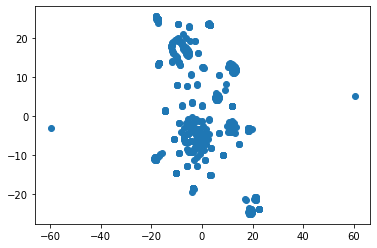

In [23]:
# Visualize the clusters
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

In [24]:
from sklearn.cluster import KMeans


In [25]:
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,x,y
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,2.282140e-15,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16,-5.232179,15.706168
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,2.525930e-15,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16,-11.705316,16.632860
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,-6.428405e-14,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14,-17.344986,24.034370
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-1.523596e-14,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15,19.421577,-24.959639
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-7.952353e-14,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14,-10.135785,-14.424635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,5.053451e-15,-2.187479e-11,-3.479650e-15,-0.851713,2.041159,3.560713,...,-1.888369e-14,1.081083e-14,-2.442418e-15,-1.163756e-14,1.668646e-14,2.036505e-14,-1.004832e-14,-3.803161e-15,17.284637,-21.530861
528,-0.333144,1.032071,-0.590740,0.001399,8.834849e-15,3.721725e-12,-1.705276e-14,-0.007154,-1.320125,-0.052460,...,1.846190e-15,-3.955569e-15,1.021953e-15,6.766213e-16,-1.874161e-15,-4.328686e-15,5.496276e-15,1.153312e-16,-10.064462,19.465786
529,0.324349,-2.312308,0.421515,-0.001319,-5.674971e-15,-3.506871e-12,1.223719e-14,0.017309,0.161077,-0.047787,...,-5.028111e-14,1.778927e-14,4.078607e-14,1.826705e-14,4.864731e-14,4.926964e-14,2.745325e-14,1.569680e-15,-18.550316,-10.546727
530,-0.149364,-2.049336,0.412968,-0.001745,-6.510239e-15,-4.640471e-12,1.293676e-14,0.028954,0.544389,0.233373,...,1.497439e-17,2.456472e-17,-1.957688e-15,1.116332e-15,1.132027e-15,3.635332e-15,-4.697815e-16,1.175227e-15,-3.535348,-18.295500


C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


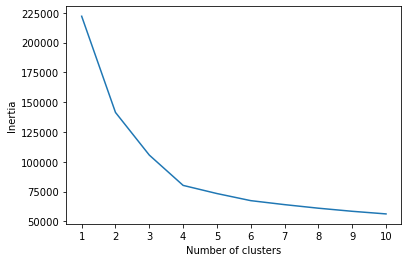

In [26]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
model = KMeans(n_clusters=4, random_state=5)

In [28]:
model.fit(df_crypto_pca)

KMeans(n_clusters=4, random_state=5)